# Data Analysis Project: E-Commerce Public Dataset

**Dataset source: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce**


# Ask Business Questions

1. From which state our customers and sellers come from?
2. What are the top selled product category?
3. What is the most used payment method here?
4. How's the customer satisfaction measured by ratings given?
5. How's monthly payment value growth, total orders, and total customers during the period of 2017-02 until 2018-08?
6. How's the delivery aspect? Does all orders arrive on time?
7. How many customer segments that can be obtained from RFM Analysis and how's the characteristics in each segments?

In [ ]:
!pip install opendatasets -q
!pip install squarify -q

In [ ]:
import opendatasets as od

od.download(
    "https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: fernanda52
Your Kaggle Key: ··········


100%|██████████| 42.6M/42.6M [00:00<00:00, 95.2MB/s]


In [ ]:
# Library for Data Wrangling
import numpy as np
import pandas as pd
import datetime as dt

# Library for Data Visualization
import seaborn as sns
sns.set(context="notebook", palette="colorblind", style = 'darkgrid' ,font_scale = 2, color_codes=True)

import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go

# Library for ignoring warnings
import warnings
warnings.filterwarnings("ignore")

# Data Wrangling

## Gathering Data

In [ ]:
df_cust = pd.read_csv('/content/brazilian-ecommerce/olist_customers_dataset.csv')
df_order_items = pd.read_csv('/content/brazilian-ecommerce/olist_order_items_dataset.csv')
df_order_payments = pd.read_csv('/content/brazilian-ecommerce/olist_order_payments_dataset.csv')
df_orders = pd.read_csv('/content/brazilian-ecommerce/olist_orders_dataset.csv')

df_sellers = pd.read_csv('/content/brazilian-ecommerce/olist_sellers_dataset.csv')
df_reviews = pd.read_csv('/content/brazilian-ecommerce/olist_order_reviews_dataset.csv')
df_products = pd.read_csv('/content/brazilian-ecommerce/olist_products_dataset.csv')
df_products_translate = pd.read_csv('/content/brazilian-ecommerce/product_category_name_translation.csv')
df_geolocation = pd.read_csv('/content/brazilian-ecommerce/olist_geolocation_dataset.csv')

## Assesing Data

In [ ]:
core_df = [df_cust, df_order_items, df_order_payments, df_orders]

for df in core_df:
    print('*'*75)
    print(df.info())
    print('*'*75)
    print(df.isnull().sum())
    print('*'*75)
    print(df.duplicated().sum())
    print('*'*75)

***************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
***************************************************************************
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
***************************************************************************
0
******************************************************************

> **There is no missing value and duplicate value in df_cust, and df_order_items. However 3 columns in df_orders: order_approved_at, order_delivered_carrier_date, and order_estimated_delivery_date has missing values.**

In [ ]:
supporting_df = [df_sellers, df_reviews, df_products, df_products_translate, df_geolocation]

for df in supporting_df:
    print('*'*75)
    print(df.info())
    print('*'*75)
    print(df.isnull().sum())
    print('*'*75)
    print(df.duplicated().sum())
    print('*'*75)

***************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None
***************************************************************************
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64
***************************************************************************
0
***************************************************************************
***************************************************************************
<class 'pandas.core

> **df_sellers and df_products don't have missing and duplicated value. df_geolocations is also free from missing value but duplicated values exist there. Some columns in df_reviews and df_products contain missing value.**

# Cleaning Data

In [ ]:
# merge all data (except df_geolocation, actually we can join it on customer_zip_code_prefix and seller_zip_code_prefix. but error raise)

df_all = pd.merge(df_cust, df_orders, on='customer_id', how='inner')
df_all = df_all.merge(df_order_items, on='order_id', how='inner')
df_all = df_all.merge(df_order_payments, on='order_id', how='inner')
df_all = df_all.merge(df_reviews, on='order_id', how='inner')
df_all = df_all.merge(df_products, on='product_id', how='inner')
df_all = df_all.merge(df_products_translate, on='product_category_name', how='inner')
df_all = df_all.merge(df_sellers, on='seller_id', how='inner')

df_all.shape

(115609, 40)

In [ ]:
# check duplicated observation
print(df_all.duplicated().sum())

# check duplicated columns
print(df_all.columns.duplicated())

0
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]


In [ ]:
#check missing values

total_missing = df_all.isnull().sum().sort_values(ascending=False)
percentage = (df_all.isnull().sum()/df_all.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percentage], axis=1, keys=['Total', 'Percent'])
missing_data['type'] = df_all.dtypes
missing_data

,Total,Percent,type
review_comment_title,101808,0.880623,object
review_comment_message,66703,0.576971,object
order_delivered_customer_date,2400,0.020760,object
order_delivered_carrier_date,1195,0.010337,object
order_approved_at,14,0.000121,object
product_width_cm,1,0.000009,float64
product_height_cm,1,0.000009,float64
product_length_cm,1,0.000009,float64
product_weight_g,1,0.000009,float64
product_name_lenght,0,0.000000,float64


In [ ]:
# we won't explore customer reviews title and messages as they're written in Portugese.
# analyzing customer reviews also didn't state in EDA objective, thus just drop these 2 columns and all columns that belong to reviews
# we only need review_id and review_score to answer our objective
df_all = df_all.drop(columns=['review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'], axis=1)
df_all.shape

(115609, 36)

In [ ]:
# just fill it one at a time
df_all['order_delivered_carrier_date'] = df_all['order_delivered_carrier_date'].interpolate(method='pad')
df_all['order_delivered_customer_date'] = df_all['order_delivered_customer_date'].interpolate(method='pad')
df_all['order_approved_at'] = df_all['order_approved_at'].interpolate(method='pad')

In [ ]:
# list of numerical columns containing missing value
missing_num = df_all[['product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm']]

# fill missing values with median for each col in missing_num
for col in missing_num:
    median_value = df_all[col].median()  # Calculate the median
    df_all[col].fillna(median_value, inplace=True)

In [ ]:
# check missing value again after cleaning
df_all.isnull().sum()

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g    

In [ ]:
df_all.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP


In [ ]:
df_all.shape

(115609, 36)

> **now our data is free from missing values, it's also free from duplicate values. thus we're ready to explore it**

# Exploratory Data Analysis (EDA)

In [ ]:
# filtering data to intended period
df_all = df_all.copy()
df_filtered = df_all[(df_all['order_purchase_timestamp'] >= "2017-02-01 00:00:00") & (df_all['order_purchase_timestamp'] < "2018-09-01 00:00:00")]
df_filtered.shape

(114229, 36)

In [ ]:
# observe some important columns
# continuos variables
continu = df_filtered[[
    'price', 'freight_value', 'payment_value',
    'product_weight_g', 'product_length_cm',
    'product_height_cm', 'product_width_cm'
]]

# discrete variables
discrete = df_filtered[[
    'payment_sequential', 'payment_installments', 'review_score'
]]

# categorical columns
cat = df_filtered[[
    'payment_type', 'order_status',
    'customer_state', 'seller_state'
]]

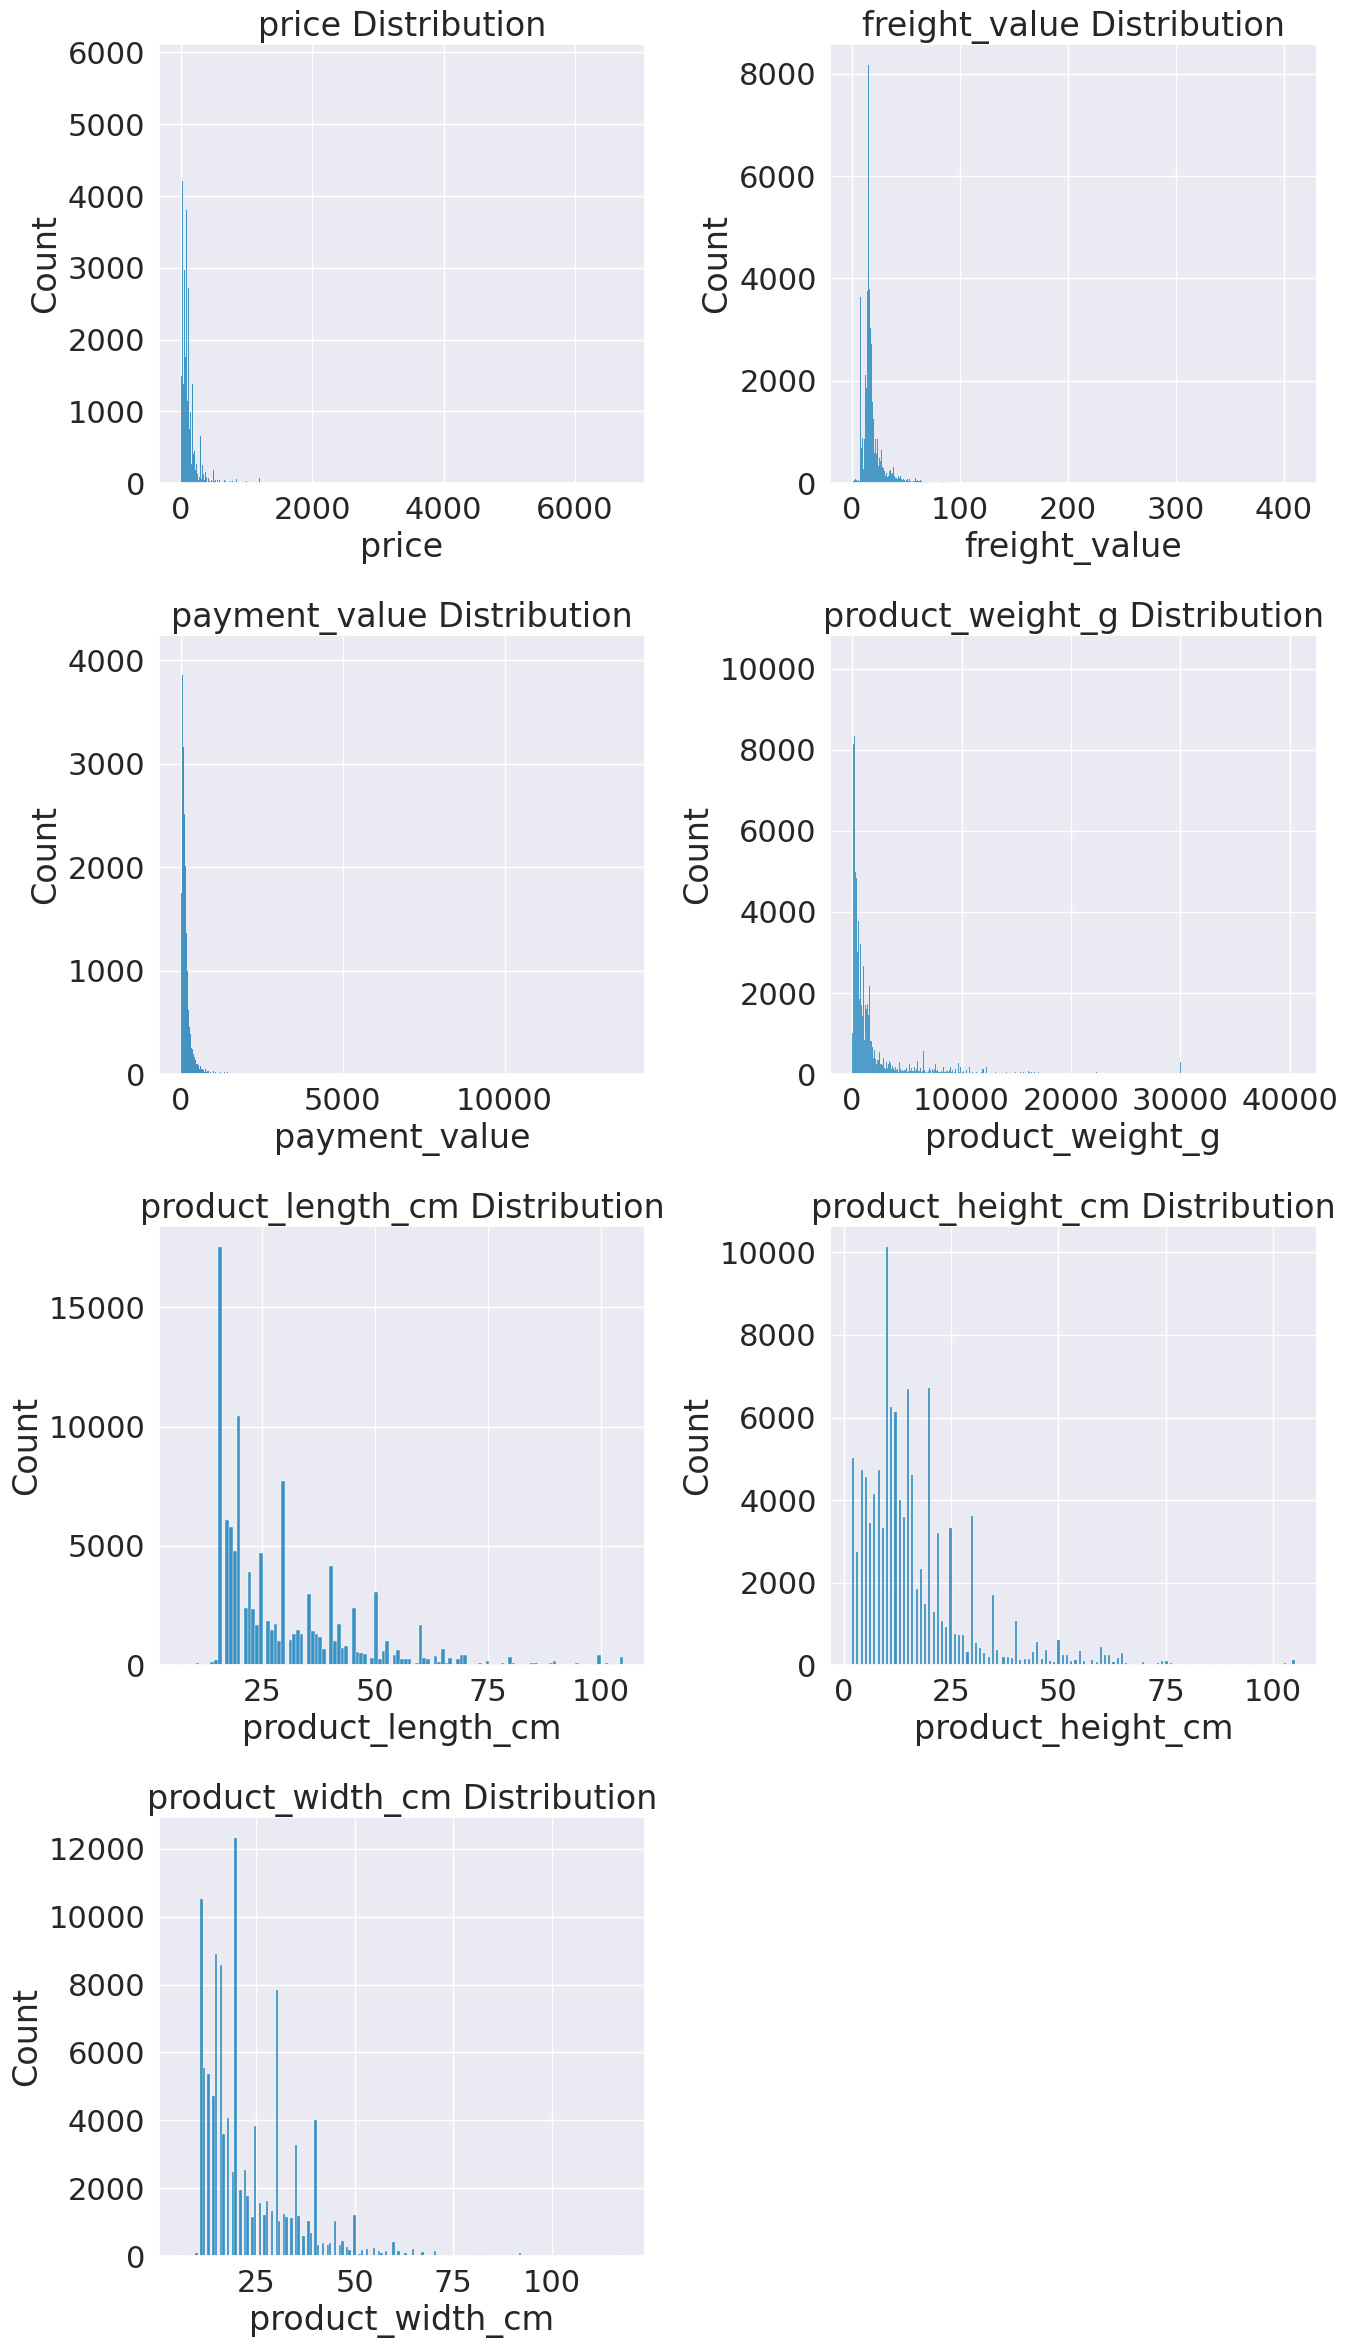

In [ ]:
# distribution of continuous variables

plt.figure(figsize=(14, 24))

for idx, column in enumerate(continu.columns):
    plt.subplot(4, 2, idx+1)
    sns.histplot(x=column, data=continu)
    plt.title(f"{column} Distribution")

plt.tight_layout()
plt.show()

> **'price', 'freight_value', 'payment_value', 'product_weight_g'** are skewed to the right.
> **'product_length_cm', 'product_height_cm', 'product_width_cm'** are also skewed to the right, but the values are more spreading than the first 3 variables mention earlier.

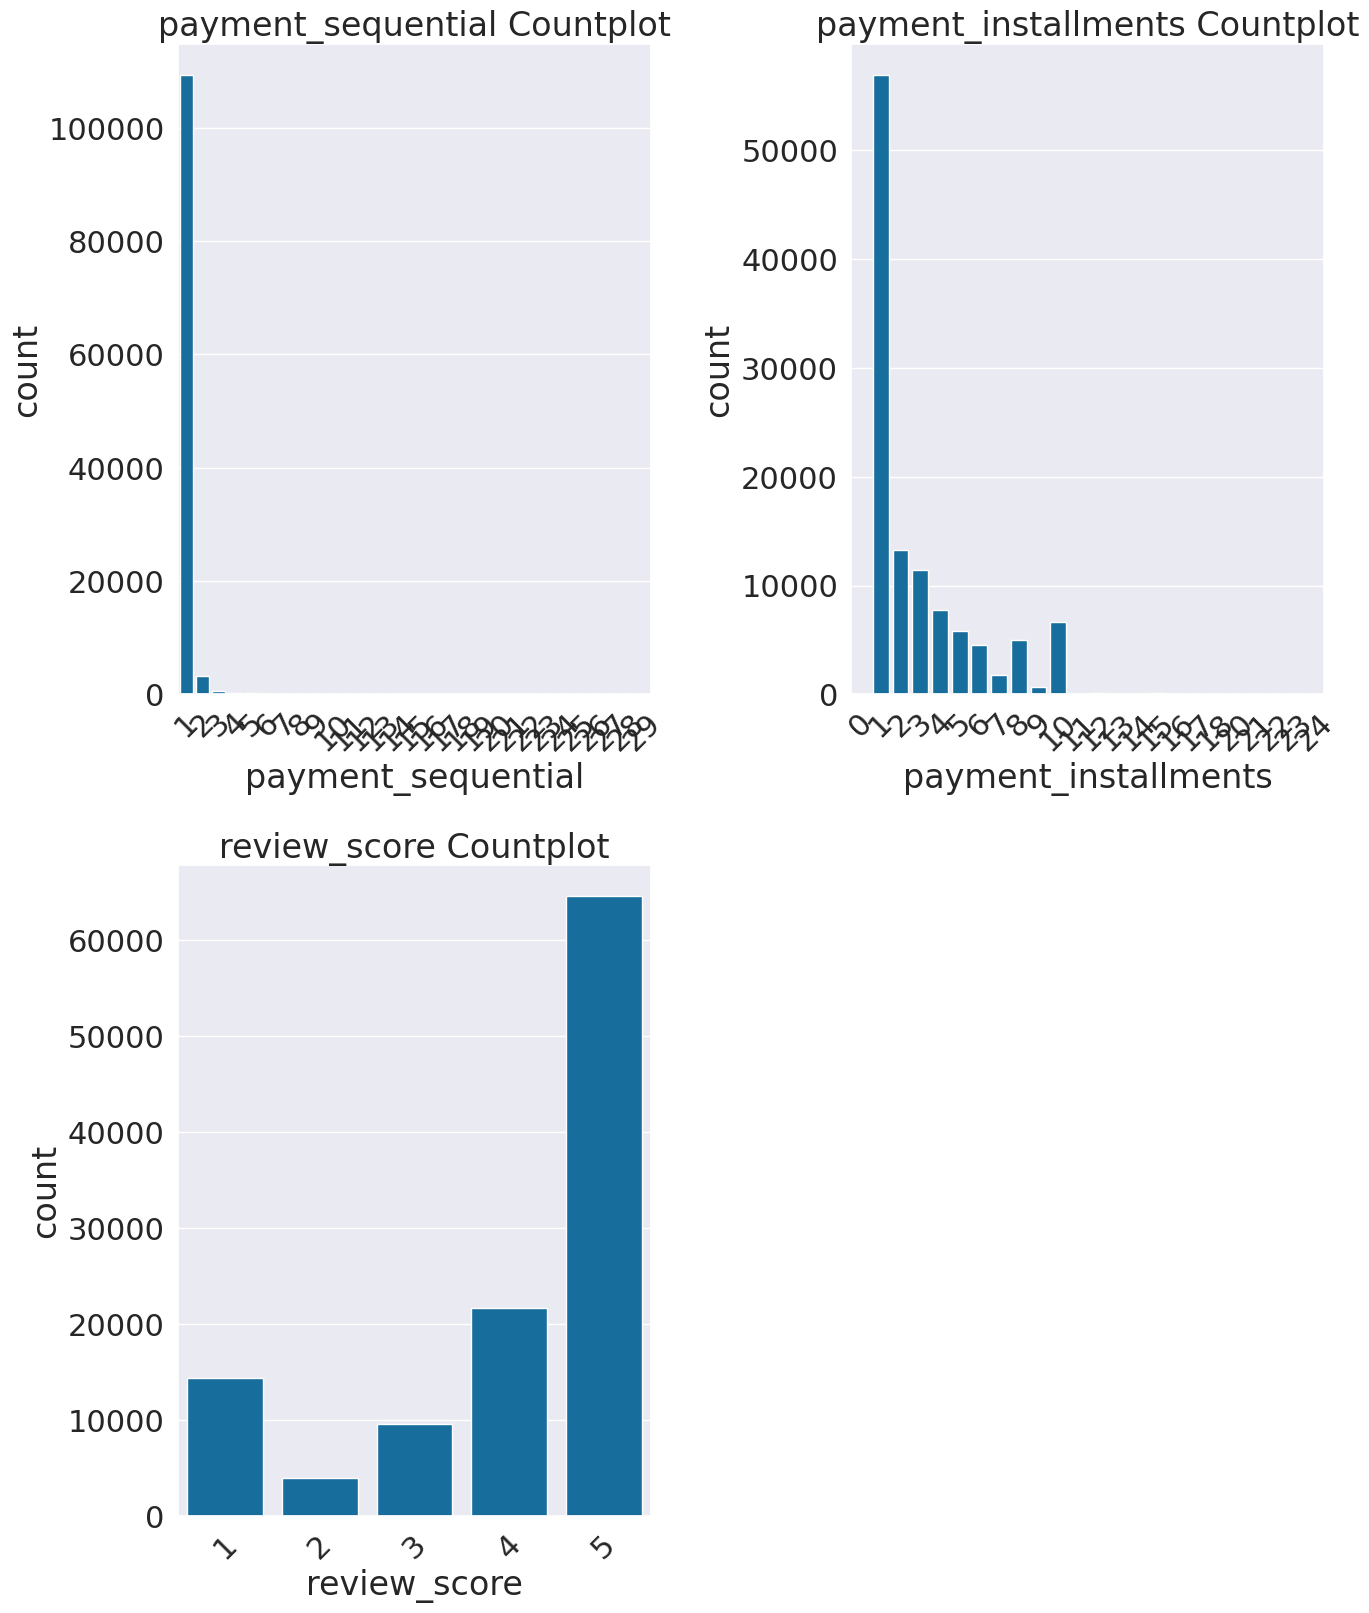

In [ ]:
# value counts of discrete variables

plt.figure(figsize=(14, 24))

for idx, column in enumerate(discrete.columns):
    plt.subplot(3, 2, idx+1)
    sns.countplot(x=column, data=discrete)
    plt.title(f"{column} Countplot")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

> **more than 95.72% or our customers has payment sequential equal to 1** which indicates the majority of our customers pay an order using only one payment method.
>
> **more than 50000 customers preffered payment of installments to 1** then followed by payment installments 2, 3, 4 and so on
>
> 65374 customers gave 5 stars, however **we still have around 14000 unsatiesfied customers that gave 1 star**

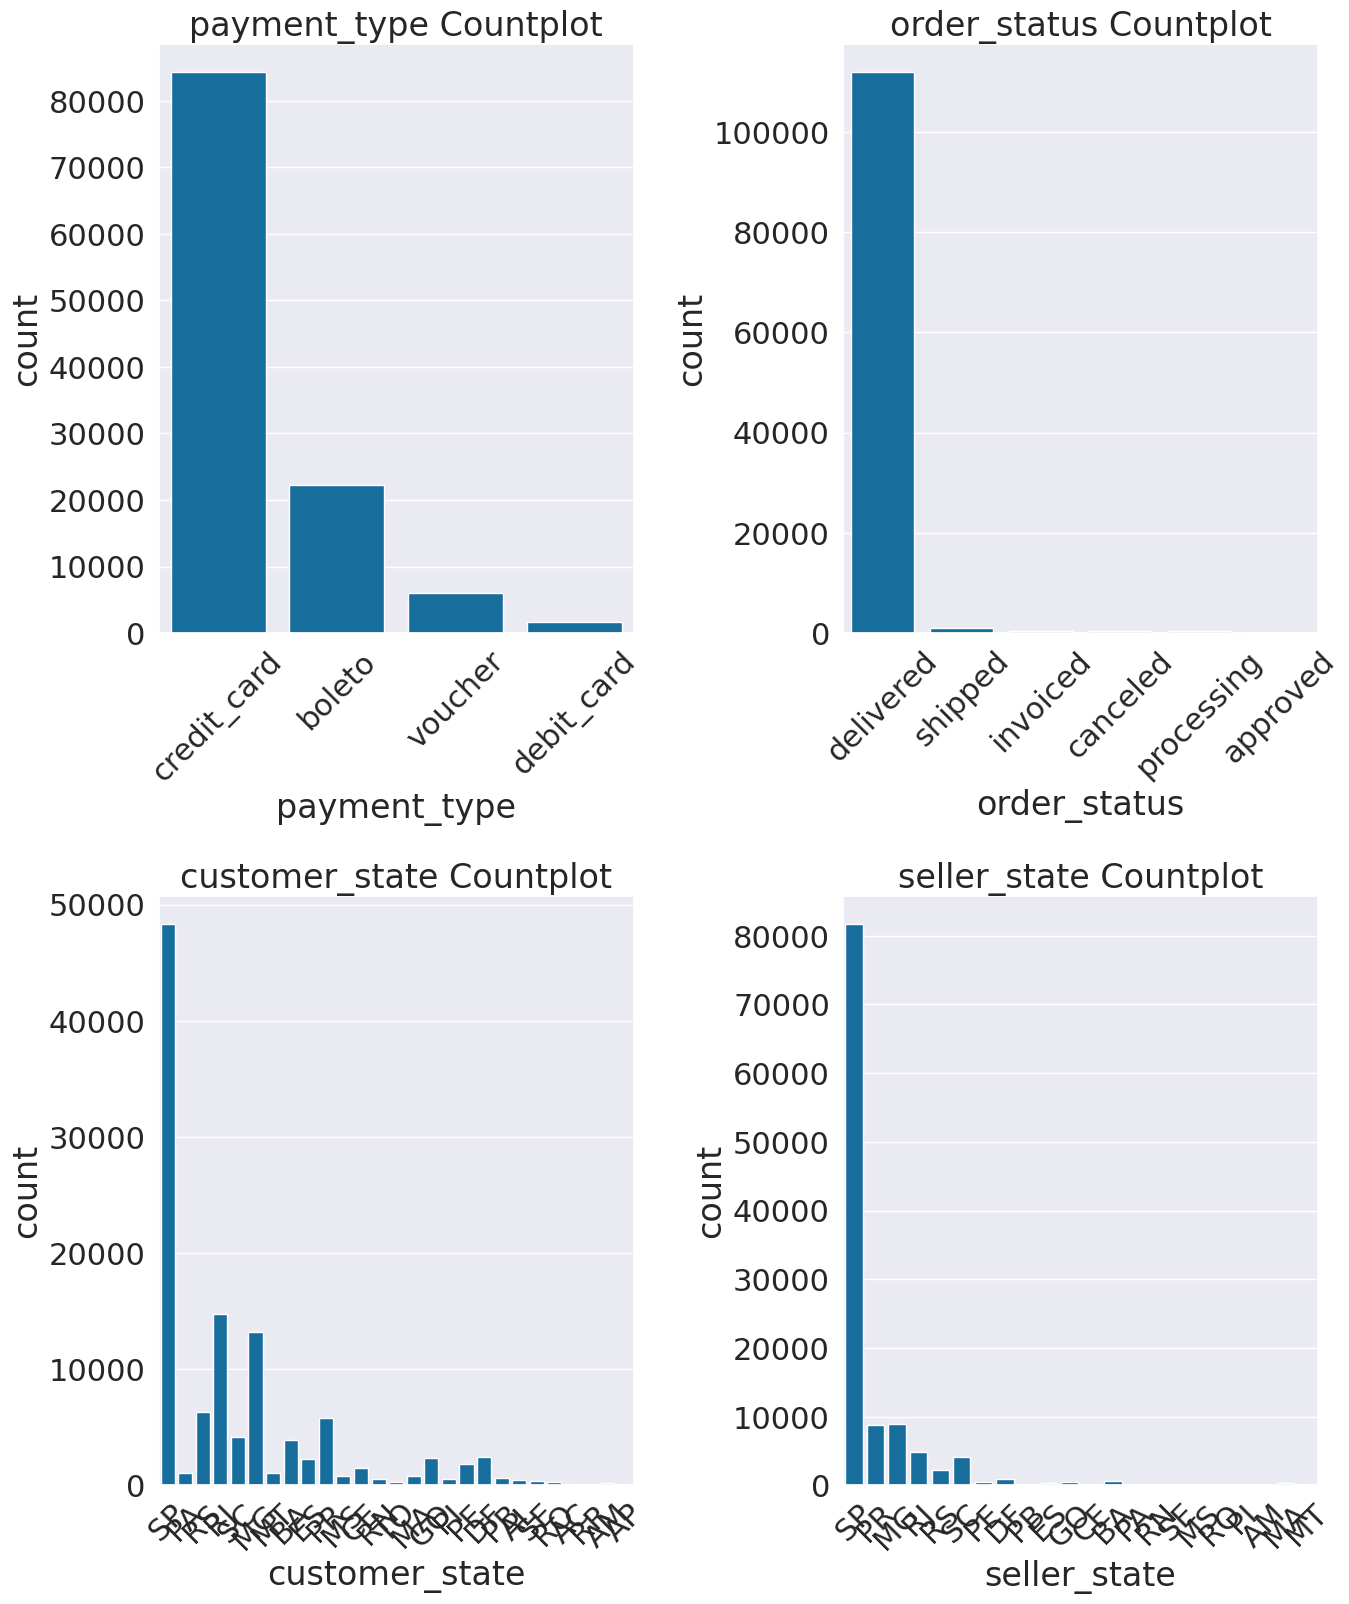

In [ ]:
# value counts of categorical variables

plt.figure(figsize=(14, 24))

for idx, column in enumerate(cat.columns):
    plt.subplot(3, 2, idx+1)
    sns.countplot(x=column, data=cat)
    plt.title(f"{column} Countplot")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

> as mentioned earlier, the majority of our customer preffered to use one payment method. **it turns out credit card is the most preferable one**, then it followed by boleto.
>
> **more than 100000 has been delivered to our customers**.
>
> **both majority seller and customer's state of origin come from state São Paulo** (SP)

# Data Transformation

### Segment product category name into 9 categories

In [ ]:
print(df_filtered.product_category_name_english.nunique())
print(df_filtered.product_category_name_english.value_counts())

71
bed_bath_table               11788
health_beauty                 9807
sports_leisure                8833
furniture_decor               8456
computers_accessories         8050
                             ...  
arts_and_craftmanship           24
la_cuisine                      15
cds_dvds_musicals               14
fashion_childrens_clothes        8
security_and_services            1
Name: product_category_name_english, Length: 71, dtype: int64


In [ ]:
def classify_product_cat(x):

    if x in ['office_furniture', 'furniture_decor', 'furniture_living_room', 'kitchen_dining_laundry_garden_furniture', 'bed_bath_table', 'home_comfort', 'home_comfort_2', 'home_construction', 'garden_tools', 'furniture_bedroom', 'furniture_mattress_and_upholstery']:
        return 'Furniture'

    elif x in ['auto', 'computers_accessories', 'musical_instruments', 'consoles_games', 'watches_gifts', 'air_conditioning', 'telephony', 'electronics', 'fixed_telephony', 'tablets_printing_image', 'computers', 'small_appliances_home_oven_and_coffee', 'small_appliances', 'audio', 'signaling_and_security', 'security_and_services']:
        return 'Electronics'

    elif x in ['fashio_female_clothing', 'fashion_male_clothing', 'fashion_bags_accessories', 'fashion_shoes', 'fashion_sport', 'fashion_underwear_beach', 'fashion_childrens_clothes', 'baby', 'cool_stuff', ]:
        return 'Fashion'

    elif x in ['housewares', 'home_confort', 'home_appliances', 'home_appliances_2', 'flowers', 'costruction_tools_garden', 'garden_tools', 'construction_tools_lights', 'costruction_tools_tools', 'luggage_accessories', 'la_cuisine', 'pet_shop', 'market_place']:
        return 'Home & Garden'

    elif x in ['sports_leisure', 'toys', 'cds_dvds_musicals', 'music', 'dvds_blu_ray', 'cine_photo', 'party_supplies', 'christmas_supplies', 'arts_and_craftmanship', 'art']:
        return 'Entertainment'

    elif x in ['health_beauty', 'perfumery', 'diapers_and_hygiene']:
        return 'Beauty & Health'

    elif x in ['food_drink', 'drinks', 'food']:
        return 'Food & Drinks'

    elif x in ['books_general_interest', 'books_technical', 'books_imported', 'stationery']:
        return 'Books & Stationery'

    elif x in ['construction_tools_construction', 'construction_tools_safety', 'industry_commerce_and_business', 'agro_industry_and_commerce']:
        return 'Industry & Construction'

In [ ]:
df_filtered['product_category_name_english'] = df_filtered.product_category_name_english.apply(classify_product_cat)
df_filtered['product_category_name_english'].value_counts()

Electronics                30006
Furniture                  28115
Entertainment              13639
Beauty & Health            13350
Home & Garden              13003
Fashion                     9792
Books & Stationery          3481
Industry & Construction     1661
Food & Drinks               1182
Name: product_category_name_english, dtype: int64

### Convert object to datetime

In [ ]:
# convert date columns into datetime

to_datetime = df_filtered.loc[:, ('order_purchase_timestamp',
                             'order_approved_at',
                             'order_delivered_carrier_date', 'order_delivered_customer_date',
                             'order_estimated_delivery_date'
                               )]

# convert object to datetime
for col in to_datetime:
    df_filtered[col] = pd.to_datetime(df_filtered[col], format='%Y-%m-%d %H:%M:%S')

In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114229 entries, 0 to 115608
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    114229 non-null  object        
 1   customer_unique_id             114229 non-null  object        
 2   customer_zip_code_prefix       114229 non-null  int64         
 3   customer_city                  114229 non-null  object        
 4   customer_state                 114229 non-null  object        
 5   order_id                       114229 non-null  object        
 6   order_status                   114229 non-null  object        
 7   order_purchase_timestamp       114229 non-null  datetime64[ns]
 8   order_approved_at              114229 non-null  datetime64[ns]
 9   order_delivered_carrier_date   114229 non-null  datetime64[ns]
 10  order_delivered_customer_date  114229 non-null  datetime64[ns]
 11  

# Visualization & Explanatory Analysis

## Q1: From which state our customers and sellers mostly come from?

<function matplotlib.pyplot.show(close=None, block=None)>

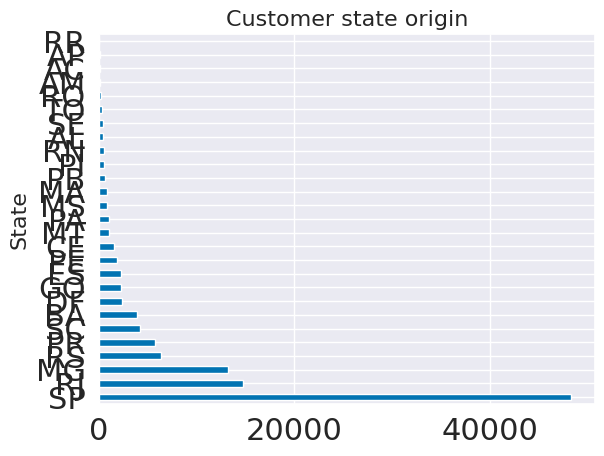

In [ ]:
customer_states = pd.value_counts(df_filtered['customer_state'].values, sort=True)
plt.title('Customer state origin', fontsize = 16)
plt.xlabel('Count of customer', fontsize = 16)
plt.ylabel('State', fontsize = 16)
customer_states.plot.barh()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

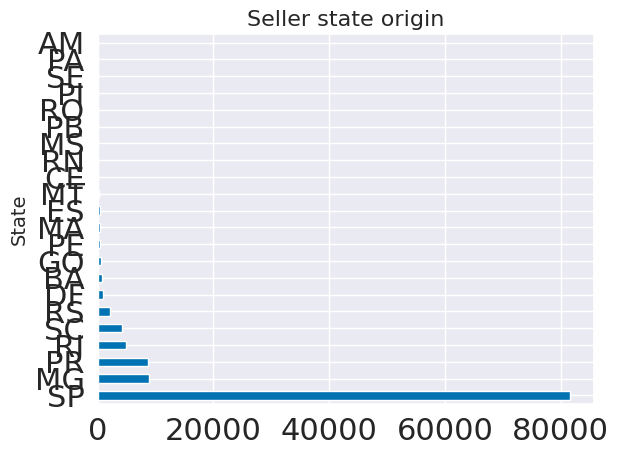

In [ ]:
seller_states = pd.value_counts(df_filtered['seller_state'].values, sort=True)
plt.title('Seller state origin', fontsize = 16)
plt.xlabel('Count of seller', fontsize = 14)
plt.ylabel('State', fontsize = 14)
seller_states.plot.barh()
plt.show

> ### Both majority seller and customer's state of origin come from state São Paulo (SP)

## Q2: What are the top selled product category?

<function matplotlib.pyplot.show(close=None, block=None)>

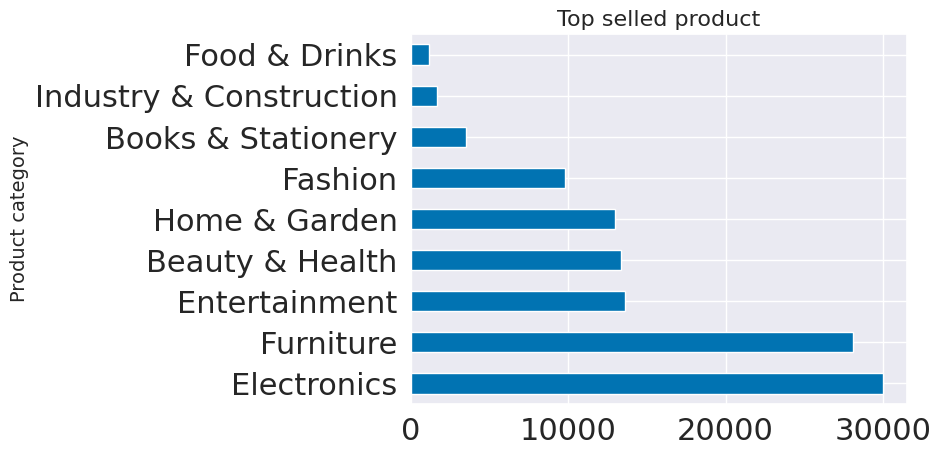

In [ ]:
top_selled_product = pd.value_counts(df_filtered['product_category_name_english'].values, sort=True)
plt.title('Top selled product', fontsize = 16)
plt.xlabel('Count of Orders', fontsize = 14)
plt.ylabel('Product category', fontsize = 14)
top_selled_product.plot.barh()
plt.show

> ### electronics is the top selled product category

## Q3: What is the most used payment method here?

<function matplotlib.pyplot.show(close=None, block=None)>

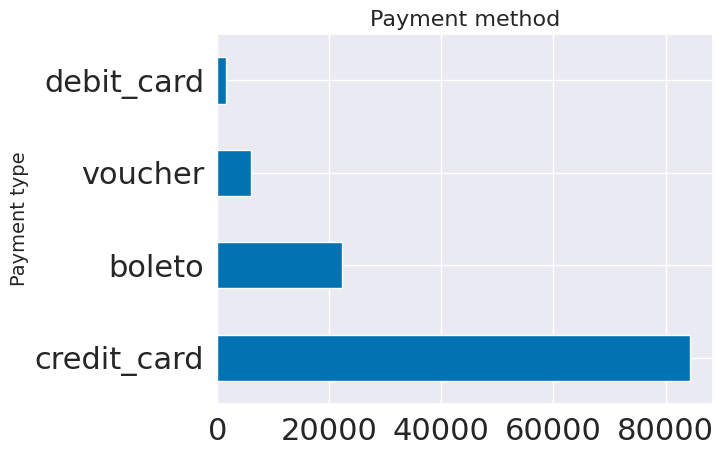

In [ ]:
payment_type = pd.value_counts(df_filtered['payment_type'].values, sort=True)
plt.title('Payment method', fontsize = 16)
plt.xlabel('Count', fontsize = 14)
plt.ylabel('Payment type', fontsize = 14)
payment_type.plot.barh()
plt.show

> ### 80000+ customers using credit card as their payment method

## Q4: How's the customer satisfaction measured by ratings given?

<function matplotlib.pyplot.show(close=None, block=None)>

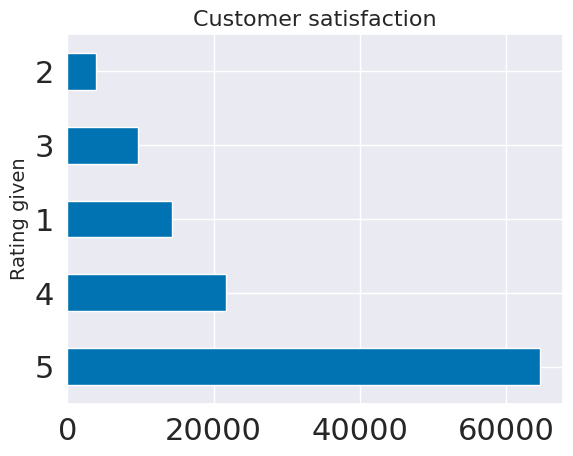

In [ ]:
ratings = pd.value_counts(df_filtered['review_score'].values, sort=True)
plt.title('Customer satisfaction', fontsize = 16)
plt.xlabel('Count', fontsize = 14)
plt.ylabel('Rating given', fontsize = 14)
ratings.plot.barh()
plt.show

> ### 60000+ customers gave full stars rating to our customers. but, 14000+ customers still unsatiesfied because they gave us 1 star

In [ ]:
# max and min order_purchase_timestamp

print('Min Purchase Date:', df_filtered.order_purchase_timestamp.dt.date.min(),
      'Max Purchase Date:', df_filtered.order_purchase_timestamp.dt.date.max())

Min Purchase Date: 2017-02-01 Max Purchase Date: 2018-08-29


In [ ]:
# Extract Year and Month from 'order_purchase_timestamp'
df_filtered['order_purchase_year'] = df_filtered.order_purchase_timestamp.apply(lambda x: x.strftime('%Y'))
df_filtered['order_purchase_month'] = df_filtered.order_purchase_timestamp.apply(lambda x: x.strftime('%M'))

# Changing the month attribute for correct ordenation
df_filtered['month_year_purchase'] = df_filtered['order_purchase_month'].astype(str).apply(lambda x: '0' + x if len(x) == 1 else x)
df_filtered['month_year_purchase'] = df_filtered['order_purchase_year'].astype(str) + '-' + df_filtered['month_year_purchase'].astype(str)

# Creating year month column
df_filtered['month_y'] = df_filtered['order_purchase_timestamp'].map(lambda date: 100*date.year + date.month)

## Q5: How's the monthly payment value growth, total orders, and total customers during the period of 2017-02 until 2018-08?

### Monthly Payment Value Growth

In [ ]:
# calculate Revenue for each row and create a new dataframe with YearMonth - Revenue columns
df_revenue_filt = df_filtered.groupby(['month_y'])['payment_value'].sum().reset_index()

# using pct_change() function to see monthly percentage change
df_revenue_filt['MonthlyGrowth'] = df_revenue_filt['payment_value'].pct_change()

df_revenue_filt

,month_y,payment_value,MonthlyGrowth
0,201702,333864.69,NaN
1,201703,512052.08,0.533711
2,201704,489106.54,-0.044811
3,201705,710302.95,0.452246
4,201706,593480.47,-0.164469
5,201707,730356.79,0.230633
6,201708,817918.78,0.119889
7,201709,1006604.81,0.230690
8,201710,994754.59,-0.011772
9,201711,1561259.71,0.569492


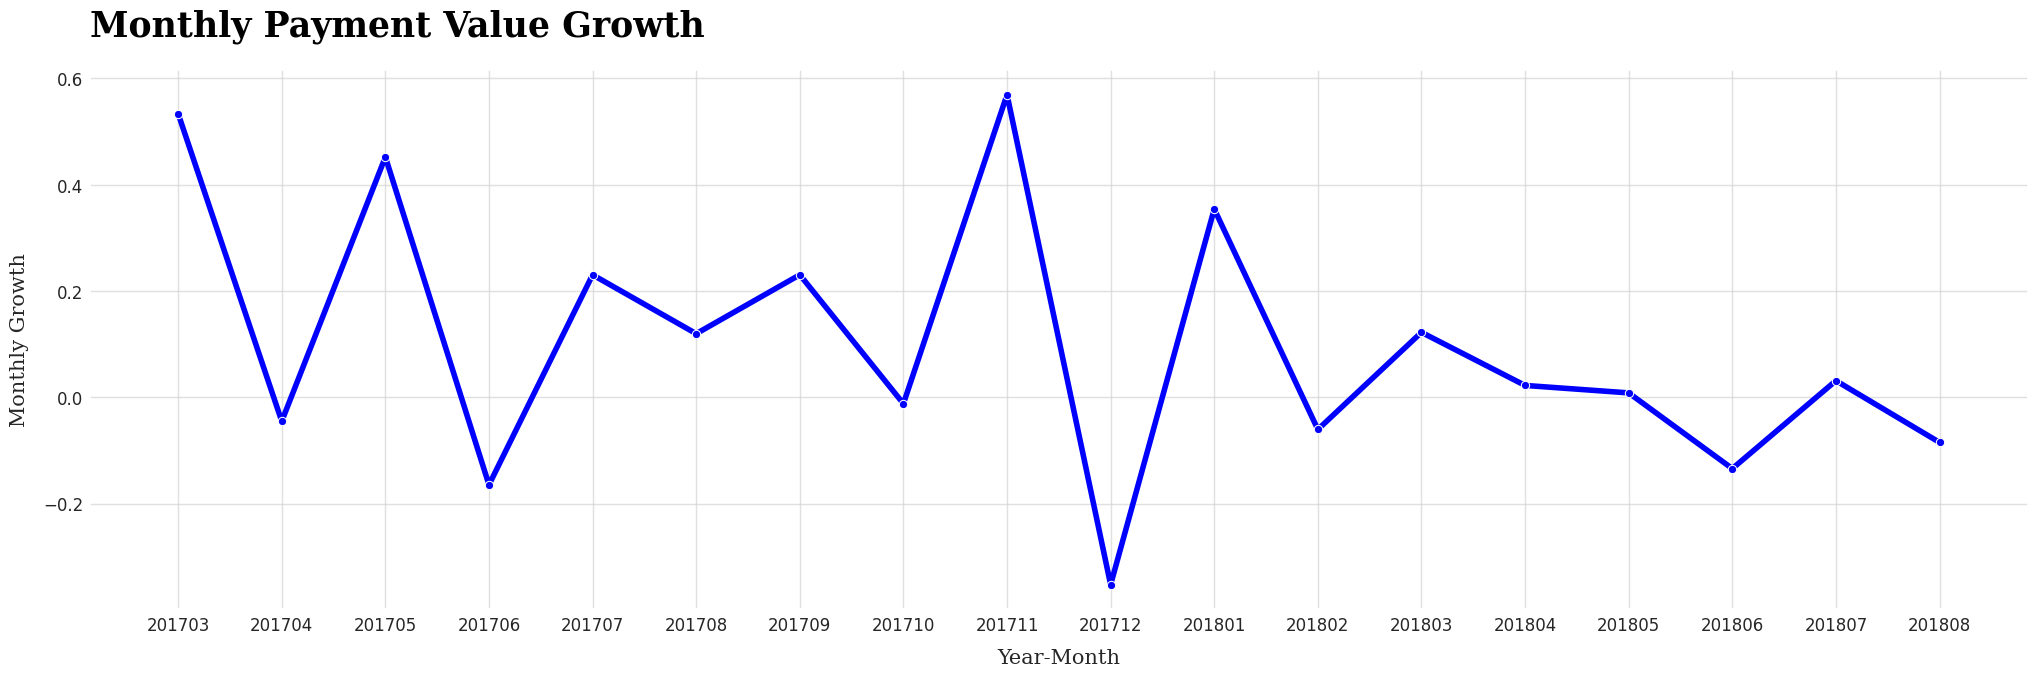

In [ ]:
# convert month_y from int to string (to avoid producing wrong plot)
df_revenue_filt['month_y'] = df_revenue_filt.month_y.astype(str)

fig = plt.figure(figsize=(25, 7))
fig.set_facecolor("#fff")
ax = fig.add_subplot()
ax.set_facecolor("#fff")
ax.grid(color="lightgrey", alpha=0.7, linewidth=1, axis="both", zorder=0)
sns.lineplot(x=df_revenue_filt.month_y, y=df_revenue_filt.MonthlyGrowth, color="blue", marker='o', err_style=None, linewidth=4, ax=ax, zorder=2)
ax.yaxis.set_tick_params(color="#000", labelsize=12, pad=5, length=0)
ax.set_ylabel("Monthly Growth", fontsize=15, fontfamily="serif", labelpad=10)
ax.set_xlabel("Year-Month", fontsize=15, fontfamily="serif", labelpad=10)
ax.xaxis.set_tick_params(color="#000", labelsize=12, pad=5, length=0)
ax.yaxis.set_tick_params(color="#000", labelsize=12, pad=5, length=0)
ax.set_title("Monthly Payment Value Growth", loc="left", color="#000", fontsize=25, pad=5, fontweight="bold", fontfamily="serif", y=1.05, zorder=3)
fig.show()

## Total Orders

In [ ]:
#creating total_orders dataframe by counting unique order_id
df_monthly_orders = df_filtered.groupby('month_y')['order_id'].nunique().reset_index()
df_monthly_orders

,month_y,order_id
0,201702,1670
1,201703,2570
2,201704,2310
3,201705,3542
4,201706,3137
5,201707,3884
6,201708,4196
7,201709,4149
8,201710,4476
9,201711,7284


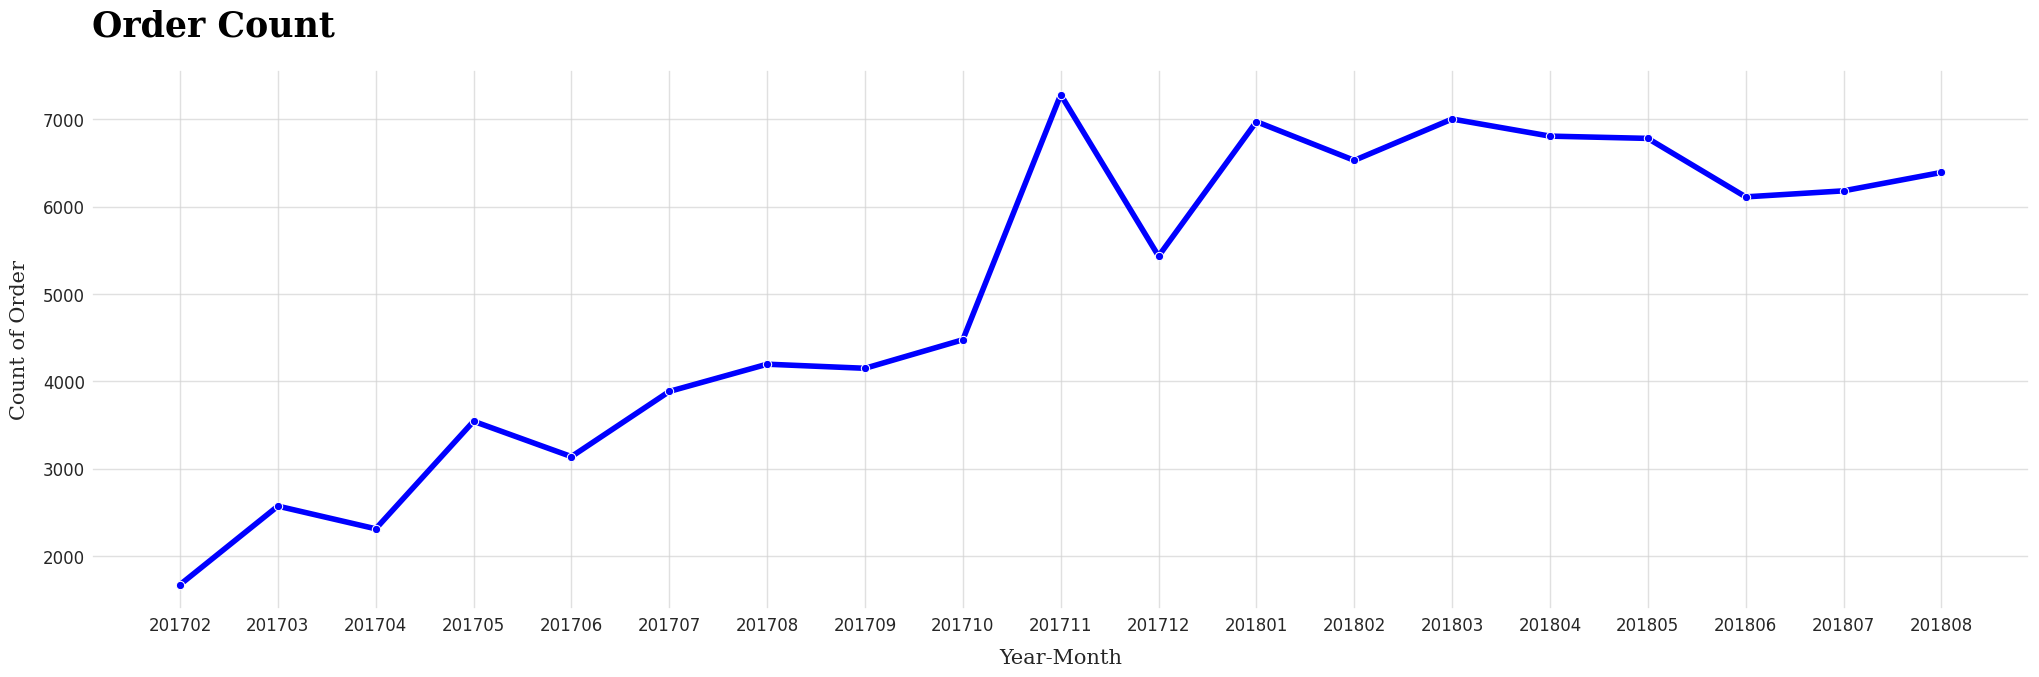

In [ ]:
# convert month_y from int to string (to avoid producing wrong plot)
df_monthly_orders['month_y'] = df_monthly_orders.month_y.astype(str)

fig = plt.figure(figsize=(25, 7))
fig.set_facecolor("#fff")
ax = fig.add_subplot()
ax.set_facecolor("#fff")
ax.grid(color="lightgrey", alpha=0.7, linewidth=1, axis="both", zorder=0)
sns.lineplot(x="month_y", y="order_id", color="blue", marker='o', err_style=None, data=df_monthly_orders, linewidth=4, ax=ax, zorder=2)
ax.yaxis.set_tick_params(color="#000", labelsize=12, pad=5, length=0)
ax.set_ylabel("Count of Order", fontsize=15, fontfamily="serif", labelpad=10)
ax.set_xlabel("Year-Month", fontsize=15, fontfamily="serif", labelpad=10)
ax.xaxis.set_tick_params(color="#000", labelsize=12, pad=5, length=0)
ax.yaxis.set_tick_params(color="#000", labelsize=12, pad=5, length=0)
ax.set_title("Order Count", loc="left", color="#000", fontsize=25, pad=5, fontweight="bold", fontfamily="serif", y=1.05, zorder=3)
fig.show()

## Total Customers

In [ ]:
#creating total_customers dataframe by counting unique customer_unique_id
df_monthly_customers = df_filtered.groupby('month_y')['customer_unique_id'].nunique().reset_index()
df_monthly_customers

,month_y,customer_unique_id
0,201702,1648
1,201703,2533
2,201704,2279
3,201705,3474
4,201706,3074
5,201707,3812
6,201708,4119
7,201709,4079
8,201710,4410
9,201711,7180


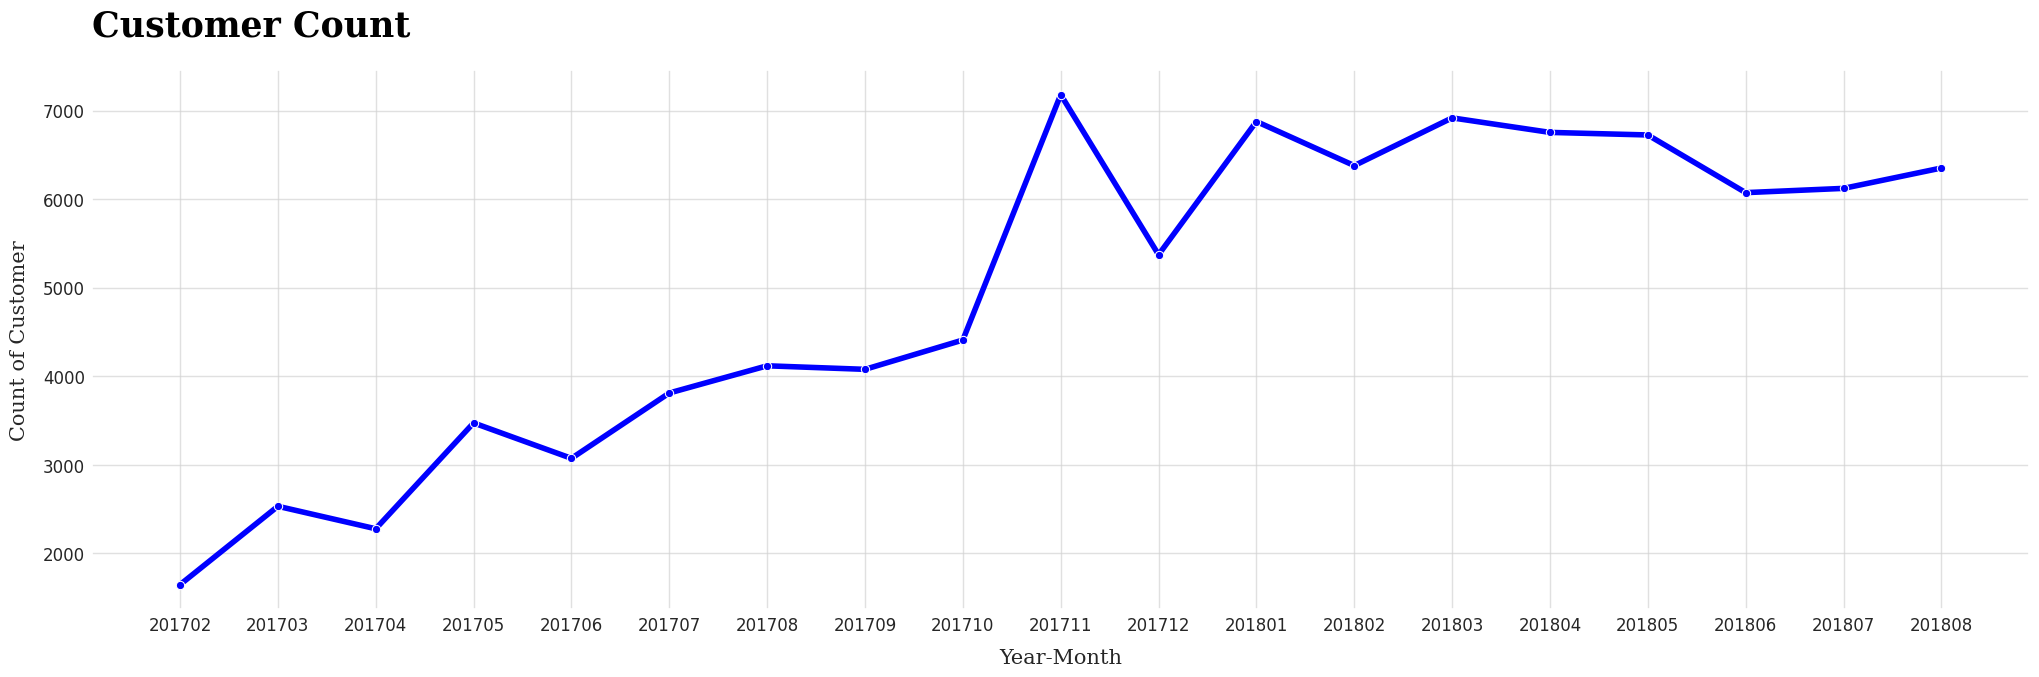

In [ ]:
# convert month_y from int to string (to avoid producing wrong plot)
df_monthly_customers['month_y'] = df_monthly_customers.month_y.astype(str)

fig = plt.figure(figsize=(25, 7))
fig.set_facecolor("#fff")
ax = fig.add_subplot()
ax.set_facecolor("#fff")
ax.grid(color="lightgrey", alpha=0.7, linewidth=1, axis="both", zorder=0)
sns.lineplot(x="month_y", y="customer_unique_id", color="blue", marker='o', err_style=None, data=df_monthly_customers, linewidth=4, ax=ax, zorder=2)
ax.yaxis.set_tick_params(color="#000", labelsize=12, pad=5, length=0)
ax.set_ylabel("Count of Customer", fontsize=15, fontfamily="serif", labelpad=10)
ax.set_xlabel("Year-Month", fontsize=15, fontfamily="serif", labelpad=10)
ax.xaxis.set_tick_params(color="#000", labelsize=12, pad=5, length=0)
ax.yaxis.set_tick_params(color="#000", labelsize=12, pad=5, length=0)
ax.set_title("Customer Count", loc="left", color="#000", fontsize=25, pad=5, fontweight="bold", fontfamily="serif", y=1.05, zorder=3)
fig.show()

> ### as we've seen in the first line plot, our monthly payment value growth is fluctuative. We achieved **the highest payment value growth in November 2017**, and **the lowest one was in August 2018**

> ### the monthly total customers and total orders show the similar trend, we can see from 2017 to 2018 our total customer and order are has increased

In [ ]:
df_filtered.to_csv('df_24_jan (gaada RFM).csv', index=False) # this csv file will be used for creating dashboard

## Q6: How's the delivery aspect? Does all orders arrive on time?

In [ ]:
# filter order_status == 'delivered'
df_delivery = df_filtered[df_filtered.order_status == 'delivered']
df_delivery.shape

(111923, 40)

In [ ]:
# create label otd_status to predict on time delivery
df_delivery['otd_status'] = df_delivery.apply(lambda row: 'on-time' if row['order_delivered_customer_date'] <= row['order_estimated_delivery_date'] else 'late', axis=1)

df_delivery['otd_status'].value_counts()

otd_status
on-time    103228
late         8695
Name: count, dtype: int64

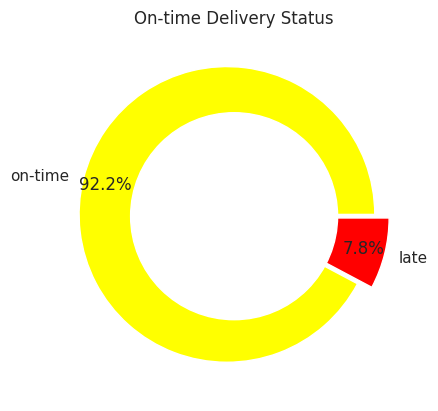

In [ ]:
# draw pie chart
colors = ['#FFFF00', '#FF0000']

explode = (0.05, 0.05)

plt.pie(df_delivery.otd_status.value_counts().values, colors=colors, labels=df_delivery.otd_status.value_counts().index,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('On-time Delivery Status')

# Displaying Chart
plt.show()

> ### for orders that has been delivered, 92.2% of them were shipped on-time and 7.8% were shipped late

## Q7: How many customer segments that can be obtained from RFM Analysis and how's the characteristics in each segments?

In [ ]:
df_filtered['first_purchase_date'] = df_filtered.groupby('customer_unique_id').order_purchase_timestamp.transform('min')
df_filtered['is_first_order'] =  df_filtered.order_purchase_timestamp == df_filtered['first_purchase_date']

df_filtered['is_first_order'].value_counts()

True     110401
False      3828
Name: is_first_order, dtype: int64

In [ ]:
(110401 / (110401+3828)) * 100

96.64883698535398

### 96.648% customer are new customers, as they're only purchase once

### Create RFM Columns

In [ ]:
# RECENCY COLUMN
# drop duplicates value in 'customer_unique_id' column
df_customers = df_filtered[['customer_unique_id']].drop_duplicates()

# get the max purchase date for each customer and create a dataframe with it
df_filtered['max_purchase_date'] = df_filtered.groupby('customer_unique_id').order_purchase_timestamp.transform('max')

# take our observation point as the max purchase date in our dataset
df_filtered['Recency'] = (df_filtered['max_purchase_date'].max() - df_filtered['max_purchase_date']).dt.days

# merge into df_customer
df_customers = pd.merge(
    df_customers,
    df_filtered[['customer_unique_id','Recency']].groupby(['customer_unique_id'],as_index=False).Recency.min(),
    on='customer_unique_id'
)

In [ ]:
# FREQUENCY COLUMN
# get order counts for each user and create a dataframe with it
df_filtered['n_order_items'] = df_filtered.groupby('order_id').order_item_id.transform('max')

n_items_per_user = df_filtered.groupby('customer_unique_id',as_index=False).n_order_items.sum().rename(columns={'n_order_items':'Frequency'})

# add 'Frequency' column into df_customers
df_customers = df_customers.merge(n_items_per_user, how='inner', on='customer_unique_id')

In [ ]:
# MONETARY COLUMN
df_revenue_mont = df_filtered.groupby('customer_unique_id', as_index=False).payment_value.sum().rename(columns={'payment_value':"Monetary"})

#merge it with our main dataframe
df_customers = pd.merge(df_customers, df_revenue_mont, on='customer_unique_id')

In [ ]:
df_customers

,customer_unique_id,Recency,Frequency,Monetary
0,861eff4711a542e4b93843c6dd7febb0,469,1,146.87
1,9eae34bbd3a474ec5d07949ca7de67c0,293,4,551.58
2,3c799d181c34d51f6d44bbbc563024db,478,1,140.61
3,23397e992b09769faf5e66f9e171a241,206,1,137.58
4,567ab47ca4deb92d46dbf54dce07d0a7,523,1,142.05
...,...,...,...,...
92395,5408b524d4f3a4ac4e9b7b52d993fae7,442,1,40.09
92396,c5da6424f1f5decedef8672a1a0103e1,8,1,314.32
92397,8d80e477643ec569b24592ce3d9dfc4c,36,4,169.26
92398,8c3c961a52bb5a0ffbce1d4e6d25cd67,31,1,77.50


In [ ]:
df_customers.info() #total rows decrease from 114229 to 92400 after creating RFM columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92400 entries, 0 to 92399
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  92400 non-null  object 
 1   Recency             92400 non-null  int64  
 2   Frequency           92400 non-null  int64  
 3   Monetary            92400 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.5+ MB


In [ ]:
# statistics summary
df_customers.describe()

,Recency,Frequency,Monetary
count,92400.000000,92400.000000,92400.000000
mean,233.040530,1.712489,212.880534
std,148.772818,4.256561,632.503883
min,0.000000,1.000000,9.590000
25%,112.000000,1.000000,64.000000
50%,215.000000,1.000000,112.920000
75%,341.000000,1.000000,203.032500
max,574.000000,441.000000,109312.640000


### RFM Segments and RFM Score

In [ ]:
# set customer_unique_id as index
rfm = df_customers.set_index('customer_unique_id')
rfm

,Recency,Frequency,Monetary
customer_unique_id,,,
861eff4711a542e4b93843c6dd7febb0,469,1,146.87
9eae34bbd3a474ec5d07949ca7de67c0,293,4,551.58
3c799d181c34d51f6d44bbbc563024db,478,1,140.61
23397e992b09769faf5e66f9e171a241,206,1,137.58
567ab47ca4deb92d46dbf54dce07d0a7,523,1,142.05
...,...,...,...
5408b524d4f3a4ac4e9b7b52d993fae7,442,1,40.09
c5da6424f1f5decedef8672a1a0103e1,8,1,314.32
8d80e477643ec569b24592ce3d9dfc4c,36,4,169.26


In [ ]:
my_rfm = rfm.copy()

r_labels=range(4,0,-1)
f_labels=range(1,5)
m_labels=range(1,5)

In [ ]:
r_quartiles = pd.qcut(my_rfm['Recency'], q=4, labels = r_labels)
f_quartiles = pd.qcut(my_rfm['Frequency'].rank(method='first'), q=4, labels = f_labels, duplicates='drop')
m_quartiles = pd.qcut(my_rfm['Monetary'].rank(method='first'), q=4, labels = m_labels, duplicates='drop')

In [ ]:
r_quartiles

#higher the number represent higher frequency and monetary [1 < 2 < 3 < 4]
#in recency, if we got R=321 then the customer last purchase time is 321 days ago this will get R=1 (the least value)
#the percentile for recency works the same (R=4 indicates the most recent purchase time), then higher the R score the better it is

customer_unique_id
861eff4711a542e4b93843c6dd7febb0    1
9eae34bbd3a474ec5d07949ca7de67c0    2
3c799d181c34d51f6d44bbbc563024db    1
23397e992b09769faf5e66f9e171a241    3
567ab47ca4deb92d46dbf54dce07d0a7    1
                                   ..
5408b524d4f3a4ac4e9b7b52d993fae7    1
c5da6424f1f5decedef8672a1a0103e1    4
8d80e477643ec569b24592ce3d9dfc4c    4
8c3c961a52bb5a0ffbce1d4e6d25cd67    4
428f4721a509be8c52de6ec2900ba918    4
Name: Recency, Length: 92400, dtype: category
Categories (4, int64): [4 < 3 < 2 < 1]

In [ ]:
#Building RFM segments
my_rfm = my_rfm.assign(R=r_quartiles,F=f_quartiles,M=m_quartiles)

# Build RFM Segment and RFM Score
my_rfm['RFM_Segment'] = my_rfm['R'].astype(str) +\
                      my_rfm['F'].astype(str) +\
                      my_rfm['M'].astype(str)

my_rfm['RFM_Score'] = my_rfm[['R','F','M']].sum(axis=1)

my_rfm #just ignore rfm in the rightmost column

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
customer_unique_id,,,,,,,,
861eff4711a542e4b93843c6dd7febb0,469,1,146.87,1,1,3,113,5
9eae34bbd3a474ec5d07949ca7de67c0,293,4,551.58,2,4,4,244,10
3c799d181c34d51f6d44bbbc563024db,478,1,140.61,1,1,3,113,5
23397e992b09769faf5e66f9e171a241,206,1,137.58,3,1,3,313,7
567ab47ca4deb92d46dbf54dce07d0a7,523,1,142.05,1,1,3,113,5
...,...,...,...,...,...,...,...,...
5408b524d4f3a4ac4e9b7b52d993fae7,442,1,40.09,1,4,1,141,6
c5da6424f1f5decedef8672a1a0103e1,8,1,314.32,4,4,4,444,12
8d80e477643ec569b24592ce3d9dfc4c,36,4,169.26,4,4,3,443,11


In [ ]:
my_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92400 entries, 861eff4711a542e4b93843c6dd7febb0 to 428f4721a509be8c52de6ec2900ba918
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Recency      92400 non-null  int64   
 1   Frequency    92400 non-null  int64   
 2   Monetary     92400 non-null  float64 
 3   R            92400 non-null  category
 4   F            92400 non-null  category
 5   M            92400 non-null  category
 6   RFM_Segment  92400 non-null  object  
 7   RFM_Score    92400 non-null  int64   
dtypes: category(3), float64(1), int64(3), object(1)
memory usage: 6.5+ MB


In [ ]:
# Mean for each RFM Score
my_rfm.groupby('RFM_Score').agg(
    #customers=('customer_unique_id', 'count'),
    mean_recency=('Recency', 'mean'),
    mean_frequency=('Frequency', 'mean'),
    mean_monetary=('Monetary', 'mean'),
    count_monetary=('Monetary', 'count')
).round(3)

,mean_recency,mean_frequency,mean_monetary,count_monetary
RFM_Score,,,,
3,445.184,1.000,45.356,1682
4,398.834,1.000,61.536,5751
5,335.348,1.000,75.574,9715
6,265.743,1.024,95.142,13860
7,234.307,1.060,132.178,16115
8,201.754,1.169,175.574,15156
9,201.268,2.131,297.758,12989
10,149.669,2.863,397.143,8935
11,112.139,4.072,527.541,5317


### RFM Segments Definition

In [ ]:
my_rfm['RFM_Segment'] = my_rfm['RFM_Segment'].astype(int)
my_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92400 entries, 861eff4711a542e4b93843c6dd7febb0 to 428f4721a509be8c52de6ec2900ba918
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Recency      92400 non-null  int64   
 1   Frequency    92400 non-null  int64   
 2   Monetary     92400 non-null  float64 
 3   R            92400 non-null  category
 4   F            92400 non-null  category
 5   M            92400 non-null  category
 6   RFM_Segment  92400 non-null  int64   
 7   RFM_Score    92400 non-null  int64   
dtypes: category(3), float64(1), int64(4)
memory usage: 6.5+ MB


In [ ]:
def customer_segments(RFM_Segment):
  if RFM_Segment == 444:
    return 'VIP'
  elif RFM_Segment >= 433 and RFM_Segment < 444:
    return 'Very Loyal'
  elif RFM_Segment >= 421 and RFM_Segment < 433:
    return 'Potential Loyalist'
  elif RFM_Segment >= 344 and RFM_Segment < 421:
    return 'New Customers'
  elif RFM_Segment >=323 and RFM_Segment < 344:
    return 'Potential Customers'
  elif RFM_Segment >= 224 and RFM_Segment < 323:
    return 'High risk to churn'
  else:
    return 'Lost Customers'

### RFM Score Grouping

In [ ]:
my_rfm['Segment'] = my_rfm['RFM_Segment'].apply(customer_segments)
my_rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,Segment
customer_unique_id,,,,,,,,,
861eff4711a542e4b93843c6dd7febb0,469,1,146.87,1,1,3,113,5,Lost Customers
9eae34bbd3a474ec5d07949ca7de67c0,293,4,551.58,2,4,4,244,10,High risk to churn
3c799d181c34d51f6d44bbbc563024db,478,1,140.61,1,1,3,113,5,Lost Customers
23397e992b09769faf5e66f9e171a241,206,1,137.58,3,1,3,313,7,High risk to churn
567ab47ca4deb92d46dbf54dce07d0a7,523,1,142.05,1,1,3,113,5,Lost Customers


In [ ]:
#count total customer for each segment
rfm_viz = my_rfm.copy()
rfm_viz['customer_unique_id'] = rfm_viz.index

#calculate sum of points for each team
rfm_viz = rfm_viz[['Segment','customer_unique_id']].groupby(['Segment']).count()
rfm_viz

,customer_unique_id
Segment,
High risk to churn,21714
Lost Customers,33258
New Customers,8496
Potential Customers,11466
Potential Loyalist,8299
VIP,2880
Very Loyal,6287


In [ ]:
#save above calculation into new df
bar_quest = rfm_viz.sort_values(ascending=False, by='customer_unique_id').reset_index()
bar_quest.rename(columns={'Segment': 'Segment Type',
                        'customer_unique_id': 'Count of Customer'}, inplace=True)
bar_quest

,Segment Type,Count of Customer
0,Lost Customers,33258
1,High risk to churn,21714
2,Potential Customers,11466
3,New Customers,8496
4,Potential Loyalist,8299
5,Very Loyal,6287
6,VIP,2880


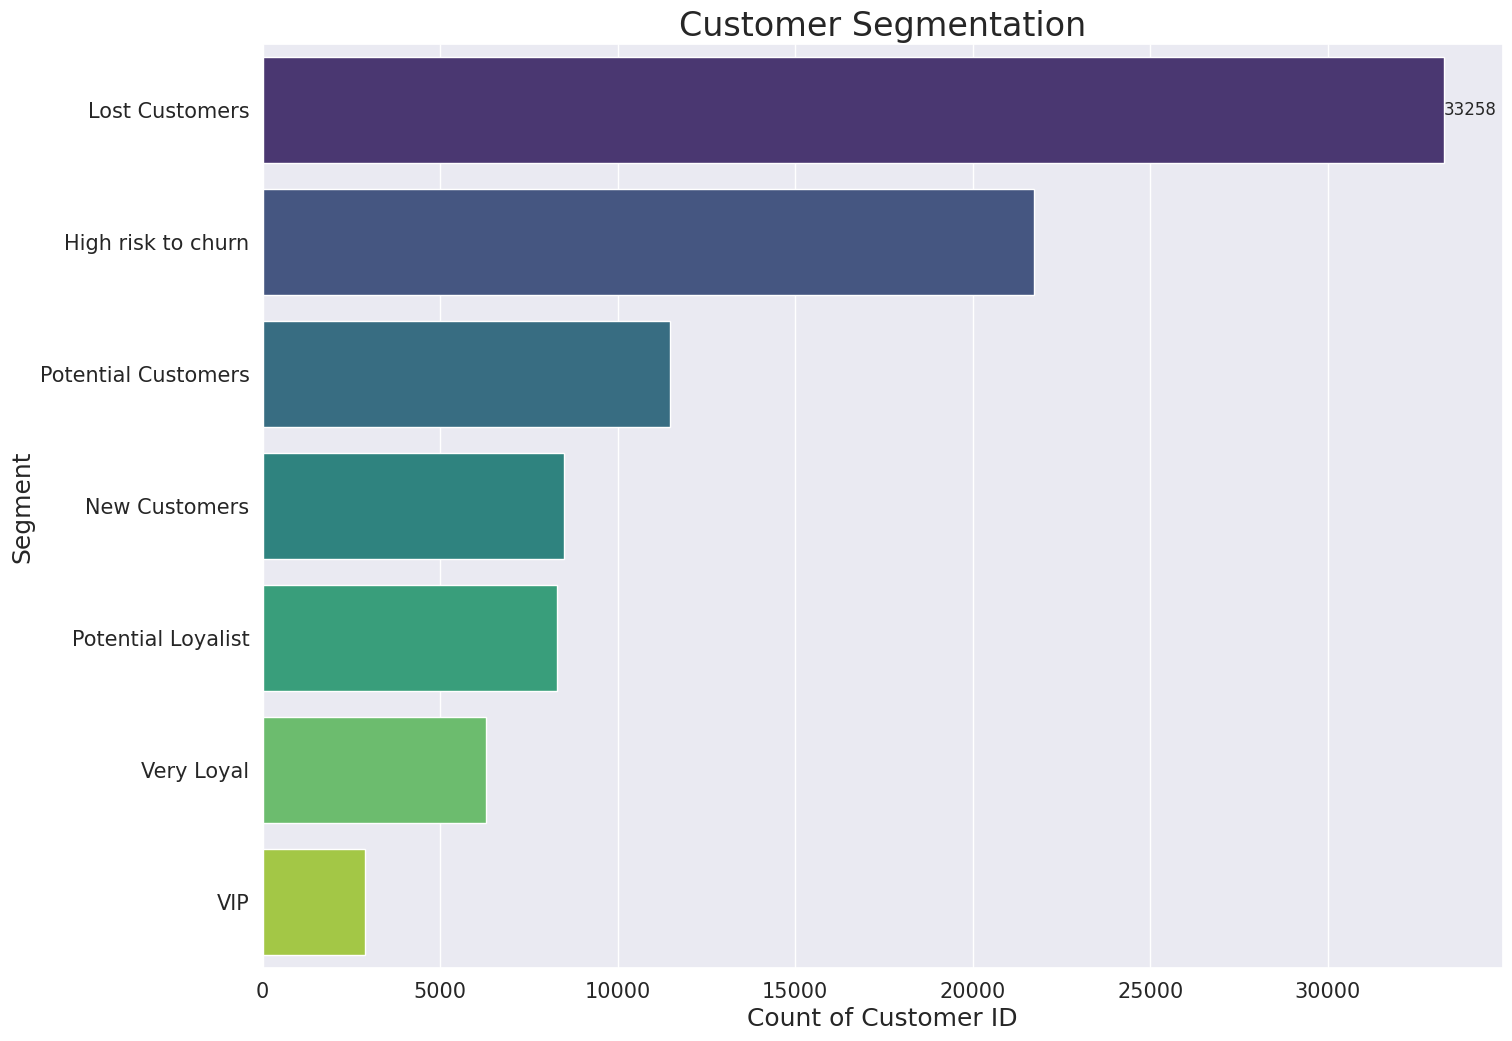

In [ ]:
#visualize count of customer id per segment
#trying to sort it descending, also show its value

sns.set()
fig = plt.figure(figsize = (16,12))
g = sns.barplot(y='Segment Type',
                x='Count of Customer',
                data=bar_quest,
                palette='viridis',
                errorbar=None)
g.bar_label(g.containers[0])
plt.title('Customer Segmentation', fontsize = 24)
plt.xlabel('Count of Customer ID', fontsize = 18)
plt.ylabel('Segment', fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

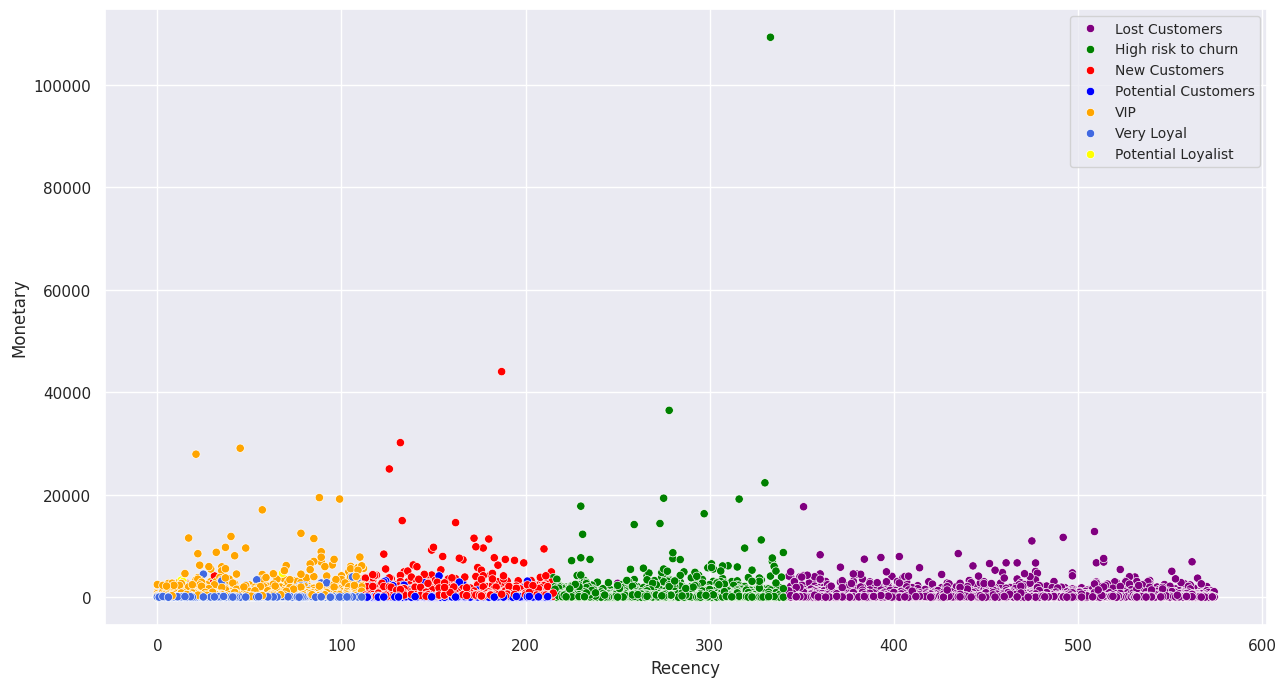

In [ ]:
# recency and monetary plot

plt.figure(figsize=(15,8))
colors = ['purple', 'green', 'red', 'blue', 'orange', 'royalblue', 'yellow']
sns.scatterplot(x=my_rfm['Recency'],
                y=my_rfm['Monetary'],
                hue=my_rfm['Segment'],
                palette = colors
                )

plt.legend(prop={'size': 10})
sns.despine

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

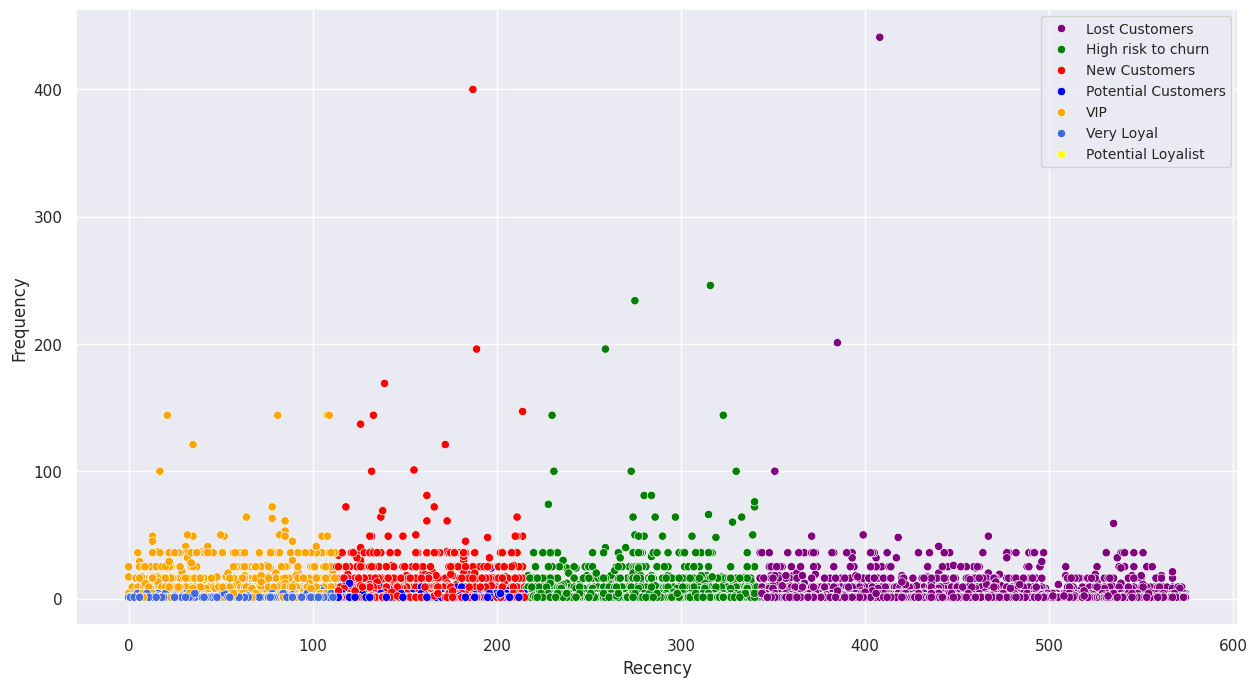

In [ ]:
# recency and frequency plot

plt.figure(figsize=(15,8))
colors = ['purple', 'green', 'red', 'blue', 'orange', 'royalblue', 'yellow']
sns.scatterplot(x=my_rfm['Recency'],
                y=my_rfm['Frequency'],
                hue=my_rfm['Segment'],
                palette = colors
                )

plt.legend(prop={'size': 10})
sns.despine

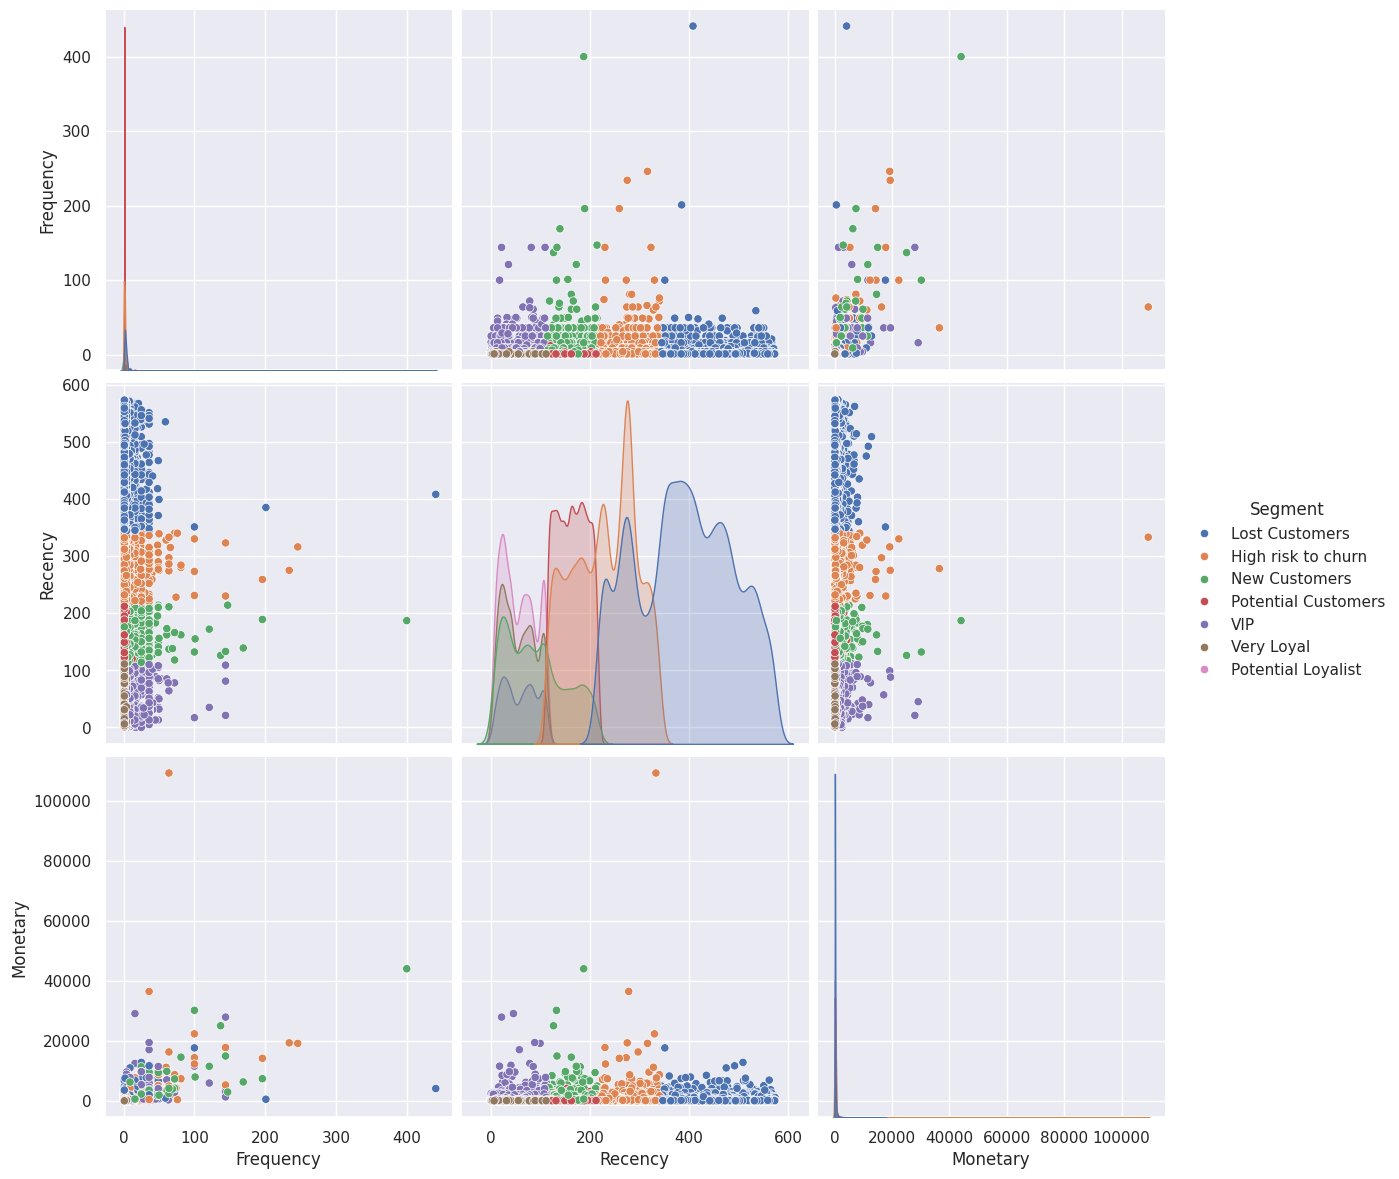

In [ ]:
fig = px.scatter_matrix(my_rfm,
                        dimensions = ['Recency', 'Frequency','Monetary'],
                        color = 'Segment',
                        symbol = 'Segment',
                        # mapbox_style = "stamen-watercolor",
                        # color_discrete_map = dict(red= 1, blue=0),
                        width=1000, height=1000
                        )
fig.update_traces(diagonal_visible=True)
fig.show()

sns.pairplot(data=my_rfm[['Frequency', 'Recency', 'Monetary', 'Segment']], hue='Segment', height=4)

In [ ]:
# RFM Segment breakdown
# RFM mean for each segment
# copy_my_rfm = my_rfm.reset_index().copy()

summary = copy_my_rfm.groupby('Segment').agg({
    'customer_unique_id': 'count',
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
}).round(3)

summary.rename(columns={
    'customer_unique_id': 'No. of customer',
    'Recency': 'Avg. Recency',
    'Frequency': 'Avg. Frequency',
    'Monetary': 'Avg. Monetary'
}, inplace=True)

summary.style.background_gradient(cmap='YlGnBu')

,No. of customer,Avg. Recency,Avg. Frequency,Avg. Monetary
Segment,,,,
High risk to churn,21714,228.564000,1.782000,222.074000
Lost Customers,33258,389.460000,1.455000,176.077000
New Customers,8496,91.437000,2.762000,330.473000
Potential Customers,11466,163.053000,1.203000,164.010000
Potential Loyalist,8299,55.053000,1.000000,116.963000
VIP,2880,58.300000,5.964000,755.235000
Very Loyal,6287,55.040000,1.341000,184.203000


# Conclusion

1. Both majority seller and customer's state of origin come from São Paulo
2. Electronics is the top selled product category
3. 80000+ customers using credit card as their payment method
4. 60000+ customers gave full stars rating to our customers. but, 14000+ customers still unsatiesfied as they gave us 1 star
5. Our monthly payment value growth is fluctuative. We achieved the highest payment value growth in November 2017, and the lowest one was in August 2018. The monthly total customers and total orders show the similar trend, generally our customers and orders from 2017 to 2018 are increase
6. For orders that has been delivered succesfully, 92.2% of them were shipped on-time and 7.8% were shipped late.
7. An analysis of 75,389 Olist customers revealed that 35.99% are "lost customers," characterized by long purchase intervals and low order volume. Additionally, 23.5% are classified as "high risk to churn" due to their recent purchase inactivity. Conversely, 12.40% of customers are identified as "potential customers," signifying recent purchases but minimal spending. The remaining customers are distributed across categories including "new customers," "potential loyalists," "very loyal," and "VIPs," with respective percentages of 9.19%, 8.98%, 6.80%, and 3.12%. While attention should be paid to all segments, prioritizing strategies to retain "lost customers" and those at "high risk to churn" is most pressing.
